In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset

In [37]:
# The number of data samples
N = 1000

# Dimension
D = 2

np.random.seed(seed=12)

'''
Dataset Preparation
'''
# Data samples, Design Matrix
X = np.random.randn(N, 2)

# affine transform
W = np.array(np.random.randn(2, 2))
b = np.random.randn(2) * 10
X = X @ W + b

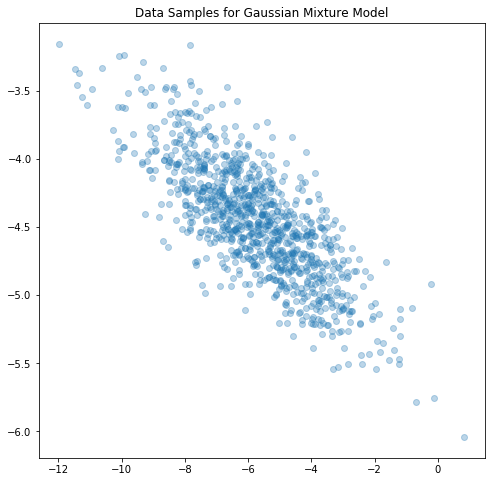

In [38]:
plt.figure(figsize=[8, 8])
plt.title('Data Samples for Gaussian Mixture Model')
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.show()

### Find mean and covariance matrix of samples
#### $$\mu={1\over N}\sum_{n=1}^{N} x_n$$
#### $$\Sigma={1\over N}\sum_{n=1}^{N} (x_n-\mu)(x_n-\mu)^T$$

In [82]:
'''
Mean of Samples
'''
x_mean = np.mean(X, axis=0)
print('mean :', x_mean)

'''
Mean of Samples
'''

# method 1. Matrix Multiplication
x_cov = ((X - x_mean).T @ (X - x_mean)) / N
print('cov :', x_cov)

# method 2. Iteration
x_cov = np.zeros([D, D])
for n in range(N):
    x_n = (X[n] - x_mean)[:, None] 
    cov = x_n @ x_n.T
    x_cov += cov
x_cov /= N
print('cov :', x_cov)

mean : [-5.78012671 -4.45629981]
cov : [[ 3.38262009 -0.61657346]
 [-0.61657346  0.18610451]]
cov : [[ 3.38262009 -0.61657346]
 [-0.61657346  0.18610451]]


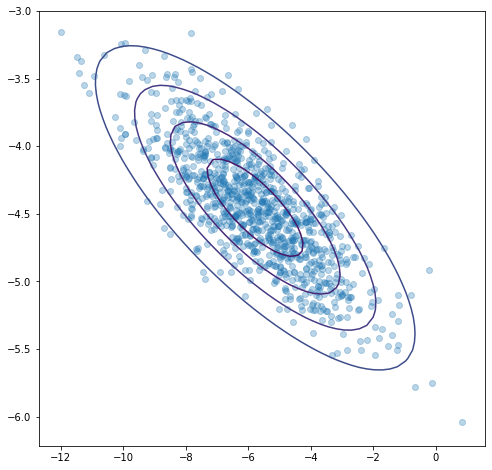

In [87]:
'''
Plot Code Reference : https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html
'''

from scipy.stats import multivariate_normal
from matplotlib.colors import LogNorm

# display predicted scores by the model as a contour plot
x = np.linspace(-12., 0.)
y = np.linspace(-6., -3.)
Xgrid, Ygrid = np.meshgrid(x, y)
XX = np.array([Xgrid.ravel(), Ygrid.ravel()]).T
Z = -multivariate_normal.logpdf(XX, mean=x_mean, cov=x_cov)
Z = Z.reshape(Xgrid.shape)

plt.figure(figsize=[8, 8])
CS = plt.contour(Xgrid, Ygrid, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 0.7, 5))
#CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.show()